# Data Wrangling
Data Wrangling is the process of `cleaning`, `transforming`, and `organizing` data so that it can be used for ` analysis and visualization` .

In [52]:
# Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [53]:
df = sns.load_dataset('titanic')

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [24]:
df.isnull().sum() / len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [25]:
df.drop(columns='deck', inplace=True)

In [26]:
df['age'] = df.age.fillna(value = df['age'].mean())

In [27]:
df['embarked'] = df.embarked.fillna(value = df['embarked'].mode()[0])

In [28]:
df['embark_town'] = df.embark_town.fillna(value = df['embark_town'].mode()[0]) 

In [10]:
df.isnull().sum() / len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers removal


# Visualization Method

<Axes: xlabel='sex', ylabel='age'>

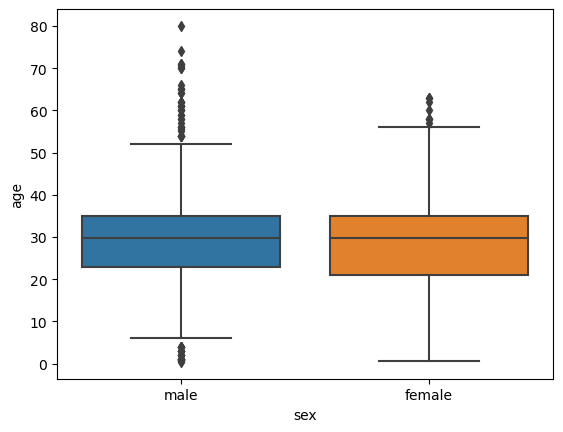

In [29]:
import seaborn as sns

sns.boxplot(data = df, y='age', x='sex')

In [32]:
# IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
IQR

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [34]:
# IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1
IQR

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [33]:
df.shape

(825, 14)

In [35]:
df.shape

(718, 14)

<Axes: xlabel='fare', ylabel='Count'>

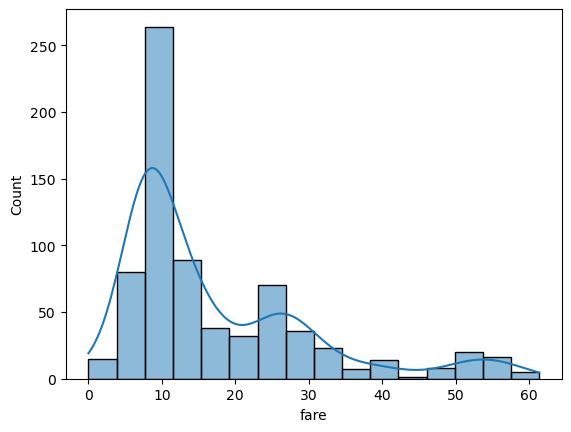

In [36]:
sns.histplot(df['fare'], kde=1)

# Finding and Dropping duplicates

In [17]:
# Finding duplicates
df.duplicated().sum()

103

In [18]:
df1 = df[df.duplicated()]
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [19]:
df1.shape

(103, 14)

In [21]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(615, 14)

# Data Normalization

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
# 1- Import Libraries
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

# 2- data
df

# 3- Select columns to normalize
cols_to_normalize = ['age', 'fare']

# 4- create the scaler function/tool
scaler = MinMaxScaler() 

# fit and transfrom the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,0.233476,0,0,0.058556,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,0.045771,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,0.321438,0,0,0.058556,C,First,man,True,C,Cherbourg,yes,True,0


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [ ]:
# 1- Import Libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler

# 2- data
df

# 3- Select columns to normalize
cols_to_normalize = ['age', 'fare']

# 4- create the scaler function/tool
scaler = StandardScaler() 

# fit and transfrom the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# check the data
df

# Log Tranformation

In [37]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
import numpy as np 


kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# log transform
kashti['age'] = np.log(kashti["age"])
kashti['fare'] = np.log(kashti["fare"])
kashti.head()

c:\Users\Afzaa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

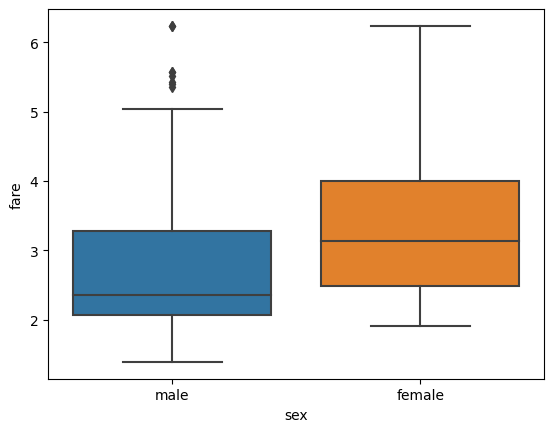

In [41]:
sns.boxplot(data=kashti, x="sex", y="fare")

<Axes: xlabel='age', ylabel='Count'>

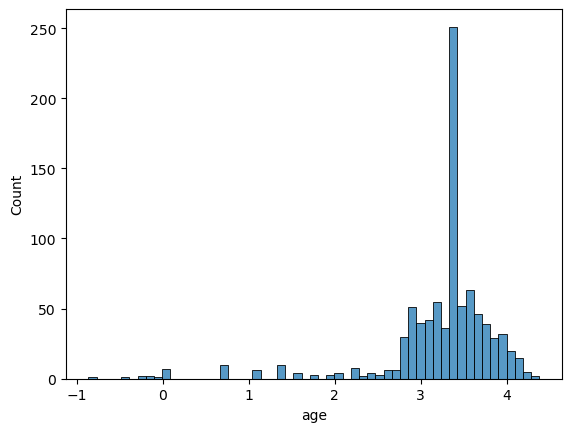

In [42]:
sns.histplot(kashti['age'])

In [56]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')

# Organizing the data

In [68]:
df['family_size'] = df['sibsp'] + df['parch']

<Axes: xlabel='sex', ylabel='age'>

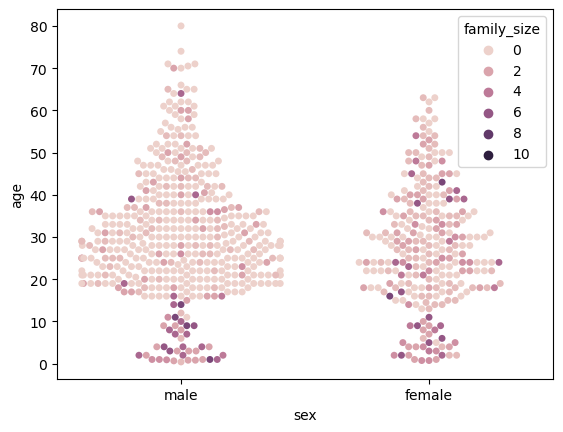

In [60]:
sns.swarmplot(data=df, x="sex", y="age", hue="family_size")

In [61]:
# Renaming of columns
df = df.rename(columns={"survived": "survival"})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')

In [64]:
table = pd.pivot_table(df, values='age', index='pclass',
    columns = "survival", aggfunc=np.sum)
table

survival,0,1
pclass,,
1,2796.5,4314.92
2,3019.0,2149.83
3,7170.0,1754.92


In [65]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


<Axes: xlabel='family_size', ylabel='Count'>

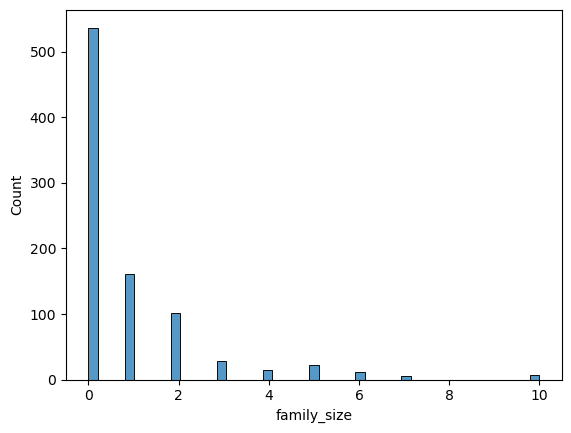

In [58]:
sns.histplot(df['family_size'])

In [69]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True,0


# saving the wrangled data

In [70]:
df.to_csv("preprocessed_data.csv")